In [1]:
import image_3d 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="matplotlib")
import os
import sys
import numpy as np
sys.path.append(os.path.join(os.path.dirname("__file__"), "../"))
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from os import path
from scipy.io import loadmat
from keras import backend as K

Using TensorFlow backend.


(23534, 3)


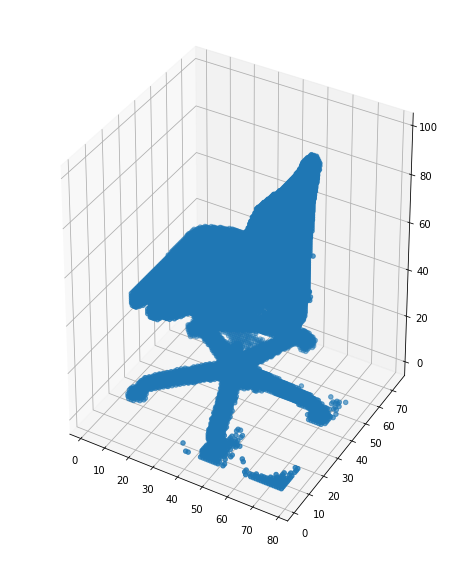

In [2]:
#plot point_cloud
f = loadmat("chairXYZ.mat")
np_pc2 = f['data'].astype(np.float32)
print(np_pc2.shape)
fig1 = plt.figure(1,figsize=(8, 10))
ax1 = fig1.add_subplot(1,1,1, projection='3d')
ax1.scatter(np_pc2[:,0], np_pc2[:,1], np_pc2[:,2])

In [3]:
def voxilize(np_pc, rot=None, TEST_CHECK=False):

    max_dist = 0.0
    for it in range(0, 3):
        # find min max & distance in current direction
        min = np.amin(np_pc[:, it])
        max = np.amax(np_pc[:, it])
        dist = max - min

        # find maximum distance
        if dist > max_dist:
            max_dist = dist

        # set middle to 0,0,0
        np_pc[:, it] = np_pc[:, it] - dist / 2 - min

        # covered cells
        CoveredCells = 29

        # find voxel edge size
        vox_sz = dist / (CoveredCells - 1)

        # if 0 divid
        if vox_sz == 0:
            vox_sz = 0.0000001

        # render pc to size 30x30x30 from middle
        np_pc[:, it] = np_pc[:, it] / vox_sz

    for it in range(0, 3):
        np_pc[:, it] = np_pc[:, it] + (CoveredCells - 1) / 2

    # round to integer array
    np_pc = np.rint(np_pc).astype(np.uint32)

    # fill voxel arrays
    vox = np.zeros([30, 30, 30])
    for (pc_x, pc_y, pc_z) in np_pc:
        vox[pc_x, pc_y, pc_z] = 1.0
        
    np_vox = np.zeros([1, 32, 32, 32])
    np_vox[0, 1:-1, 1:-1, 1:-1] = vox

    return np_vox

In [4]:
def voxel_scatter(np_vox):
    vox_scat = np.zeros([0, 3], dtype=np.uint32)

    # itterate through x-dimensions
    for x in range(0, np_vox.shape[1]):
        # itterate through y-dimension
        for y in range(0, np_vox.shape[2]):
            # itterate through z-dimension
            for z in range(0, np_vox.shape[3]):
                # if voxel is dense add to scatter array
                if np_vox[0, x, y, z] == 1.0:
                    arr_tmp = np.zeros([1, 3], dtype=np.uint32)
                    arr_tmp[0, :] = (x, y, z)
                    vox_scat = np.concatenate((vox_scat, arr_tmp))
    return vox_scat

In [7]:
def initialize(np_pc2):
    np_vox1 = np.array([voxilize(np_pc2, TEST_CHECK=True)])
    x = np.copy(np_vox1)
    rounds = 1
    ax = np.zeros(tuple([rounds * x.shape[0]] + list(x.shape)[1:]), dtype=K.floatx())
    return x, ax

In [8]:
def show_voxel(x):
    vox_scat1 = voxel_scatter(x[0])
    fig2 = plt.figure(2,figsize=(8, 10))
    ax1 = fig2.add_subplot(1,1,1, projection='3d')
    ax1.scatter(vox_scat1[:,0], vox_scat1[:,1], vox_scat1[:,2])
    plt.draw()

# Rotation X 45 degree

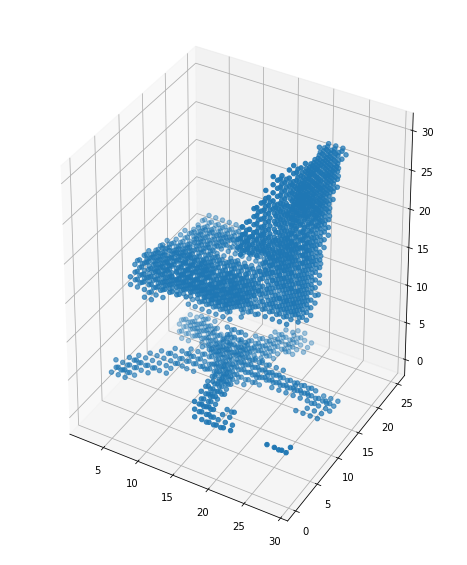

In [10]:
x, ax = initialize(np_pc2)

for r in range(rounds):
    for i in range(x.shape[0]):
        ax[i + r * x.shape[0]]  = image_3d.random_transform(x[i], rotation_range=90.0, rotation_choice_number=1, 
                                                            row_axis=2, col_axis=3, depth_axis=4, channel_axis=1)
    x = ax

show_voxel(x)

# Rotation Y 45 degree

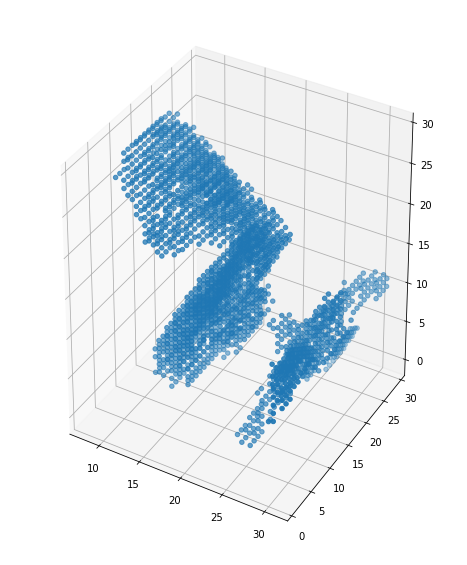

In [11]:
x, ax = initialize(np_pc2)

for r in range(rounds):
    for i in range(x.shape[0]):
        ax[i + r * x.shape[0]]  = image_3d.random_transform(x[i], rotation_range=90.0, rotation_choice_number=2, 
                                                            row_axis=2, col_axis=3, depth_axis=4, channel_axis=1)
    x = ax

show_voxel(x)

# Rotation Z 45 degree

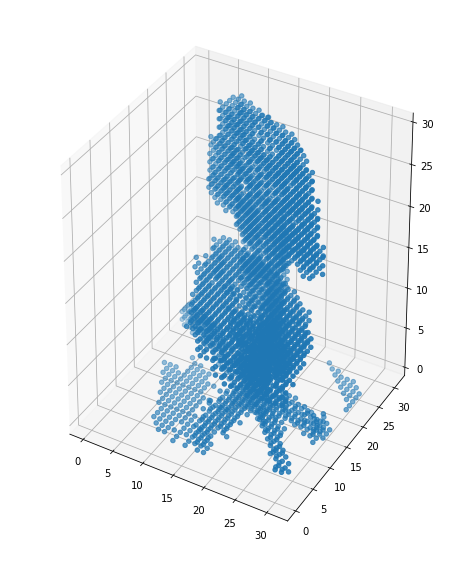

In [12]:
x, ax = initialize(np_pc2)

for r in range(rounds):
    for i in range(x.shape[0]):
        ax[i + r * x.shape[0]]  = image_3d.random_transform(x[i], rotation_range=90.0, rotation_choice_number=3, 
                                                            row_axis=2, col_axis=3, depth_axis=4, channel_axis=1)
    x = ax

show_voxel(x)

# height_shift

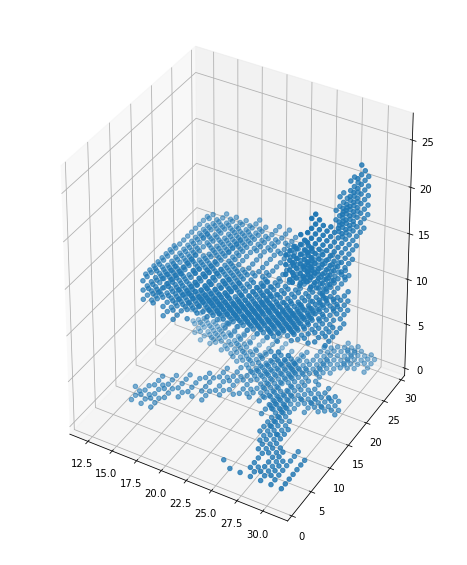

In [19]:
x, ax = initialize(np_pc2)

for r in range(rounds):
    for i in range(x.shape[0]):
        ax[i + r * x.shape[0]]  = image_3d.random_transform(x[i], height_shift_range=0.5, 
                                                            row_axis=2, col_axis=3, depth_axis=4, channel_axis=1)
    x = ax

show_voxel(x)

# Width_shift

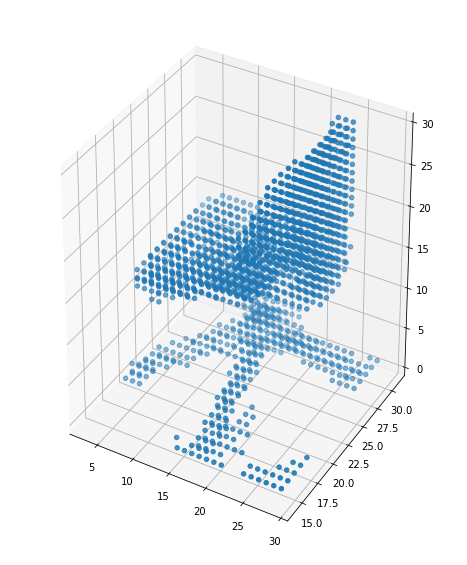

In [21]:
x, ax = initialize(np_pc2)

for r in range(rounds):
    for i in range(x.shape[0]):
        ax[i + r * x.shape[0]]  = image_3d.random_transform(x[i], width_shift_range=0.5, 
                                                            row_axis=2, col_axis=3, depth_axis=4, channel_axis=1)
    x = ax

show_voxel(x)

# Depth shift

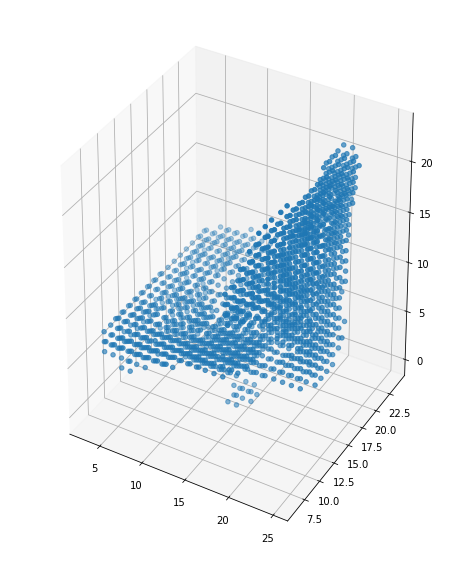

In [22]:
x, ax = initialize(np_pc2)

for r in range(rounds):
    for i in range(x.shape[0]):
        ax[i + r * x.shape[0]]  = image_3d.random_transform(x[i], depth_shift_range=0.5, 
                                                            row_axis=2, col_axis=3, depth_axis=4, channel_axis=1)
    x = ax

show_voxel(x)

# Shear range

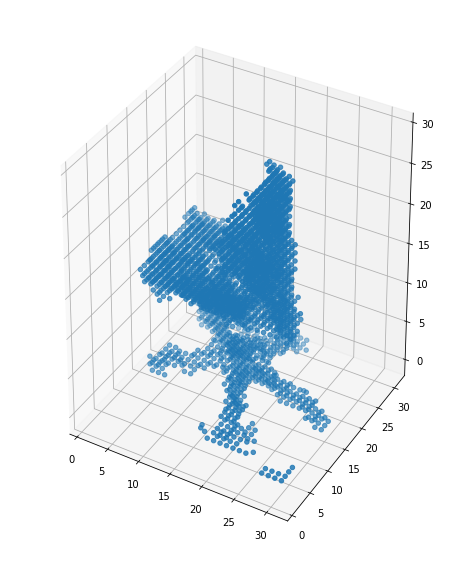

In [31]:
x, ax = initialize(np_pc2)

for r in range(rounds):
    for i in range(x.shape[0]):
        ax[i + r * x.shape[0]]  = image_3d.random_transform(x[i], shear_range=0.2, 
                                                            row_axis=2, col_axis=3, depth_axis=4, channel_axis=1)
    x = ax

show_voxel(x)

# Flip

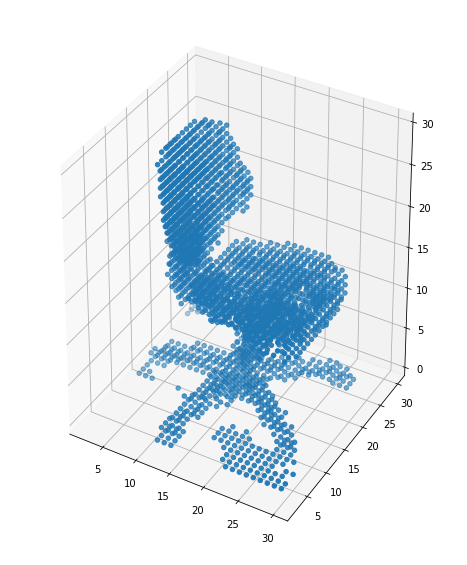

In [34]:
x, ax = initialize(np_pc2)

for r in range(rounds):
    for i in range(x.shape[0]):
        ax[i + r * x.shape[0]]  = image_3d.random_transform(x[i], horizontal_flip=True, vertical_flip=True, 
                                                            row_axis=2, col_axis=3, depth_axis=4, channel_axis=1)
    x = ax

show_voxel(x)

# Flip

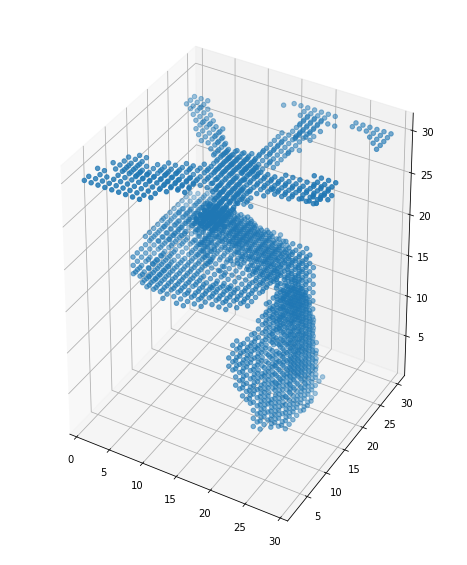

In [35]:
x, ax = initialize(np_pc2)

for r in range(rounds):
    for i in range(x.shape[0]):
        ax[i + r * x.shape[0]]  = image_3d.random_transform(x[i], horizontal_flip=True, depth_flip=True, 
                                                            row_axis=2, col_axis=3, depth_axis=4, channel_axis=1)
    x = ax

show_voxel(x)